<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-22 22:58:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.3’

survey-results-publ 100%[===================>] 201.62M  59.7MB/s    in 3.4s    

2025-04-22 22:58:45 (59.4 MB/s) - ‘survey-results-public.sqlite.3’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 173.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 172.1 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 148.3 MB/s eta 0:00:00


In [5]:
!pip install seaborn

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


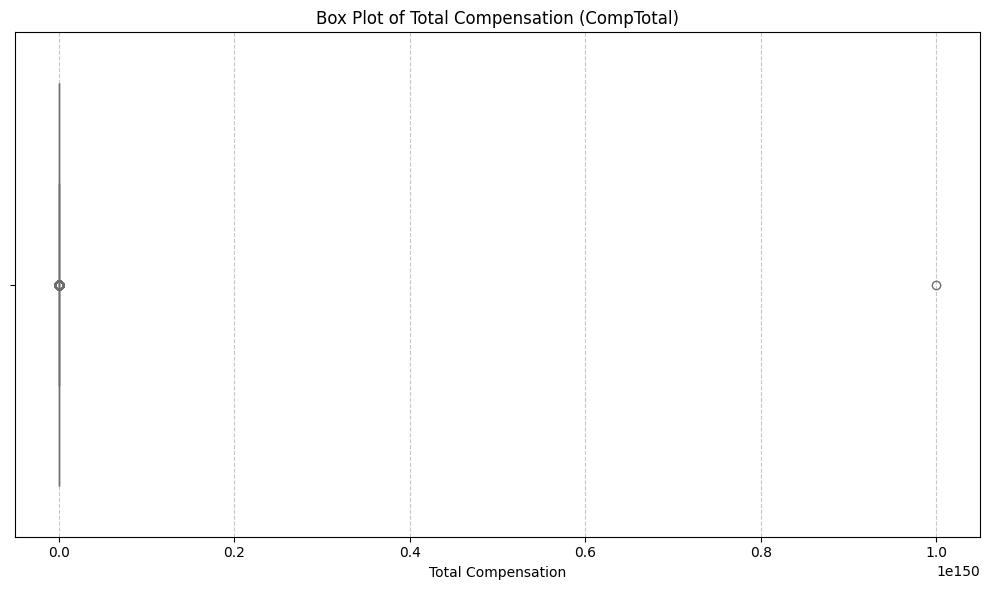

In [10]:
# your code goes here
query = """SELECT CompTotal
            FROM main
            WHERE CompTotal IS NOT NULL AND CompTotal != 'NA'
        """
df = pd.read_sql_query(query, conn)

# Convert to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompTotal'], color='skyblue')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


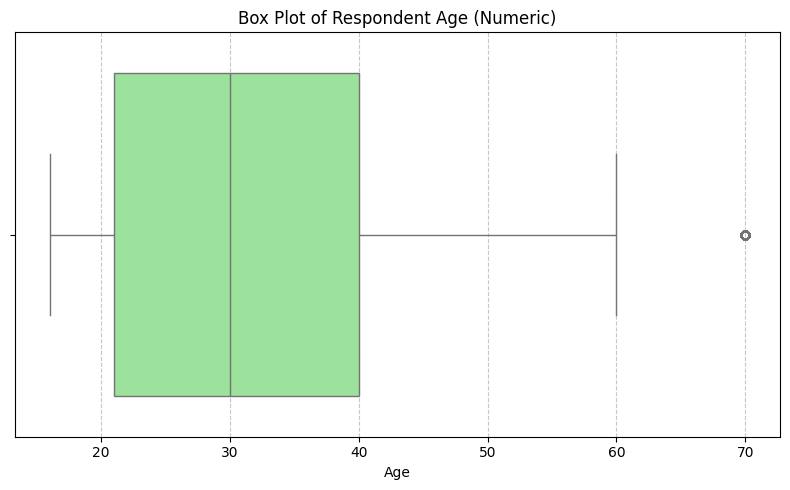

In [11]:
# your code goes here
query = """SELECT Age FROM main
            WHERE Age IS NOT NULL AND Age != 'NA'
        """
df = pd.read_sql_query(query, conn)

# Map age groups to numeric values (approximate midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_mapping)
df = df.dropna(subset=['AgeNumeric'])

# Plot the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AgeNumeric'], color='lightgreen')
plt.title('Box Plot of Respondent Age (Numeric)')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


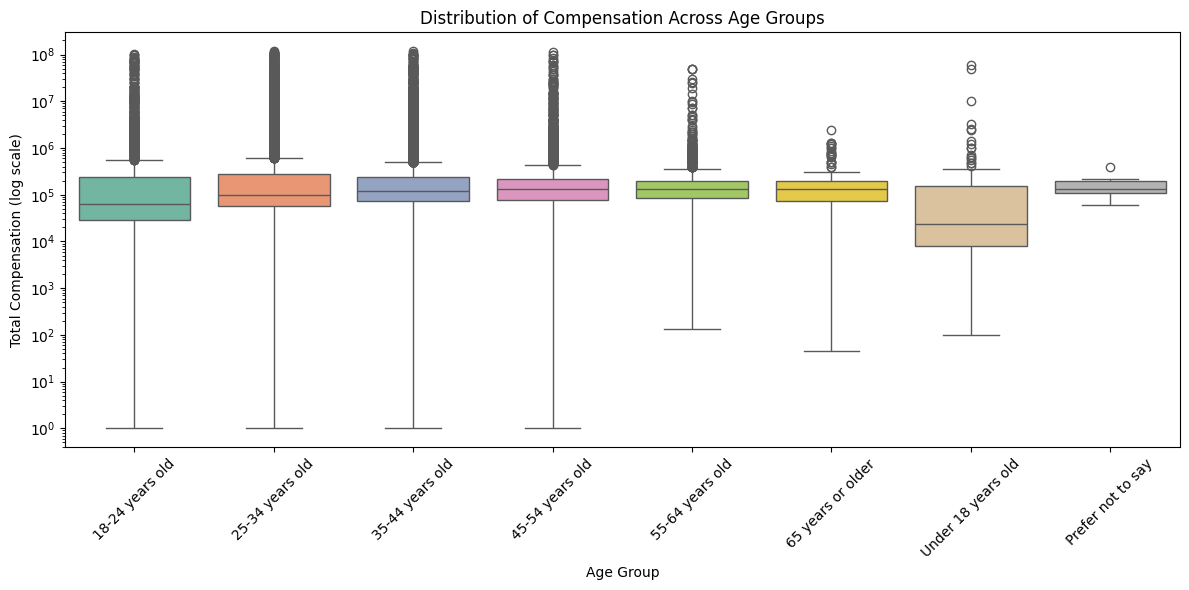

In [12]:
# your code goes here
query = """
SELECT Age, CompTotal AS CompTotal
FROM main
WHERE Age IS NOT NULL AND Age != 'NA'
  AND CompTotal IS NOT NULL
  AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)

# Optional: Filter out extreme outliers in compensation
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# Plot boxplot of compensation by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal',hue='Age', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale if there’s a large range in compensation
plt.title('Distribution of Compensation Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


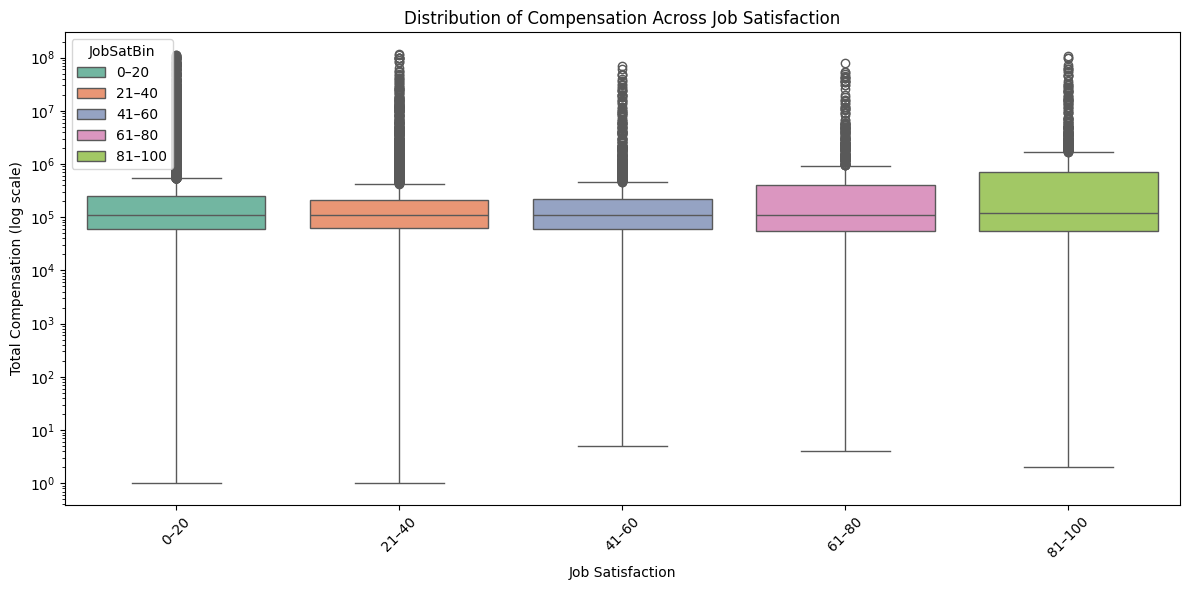

In [27]:
# your code goes here
query = """
SELECT JobSatPoints_6, CompTotal AS CompTotal
FROM main
WHERE 
   CompTotal !='NA'
  AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)

# Optional: Filter out extreme outliers in compensation
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]
# Bin job satisfaction scores
bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']
df['JobSatBin'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of compensation by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatBin', y='CompTotal',hue='JobSatBin', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale if there’s a large range in compensation
plt.title('Distribution of Compensation Across Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


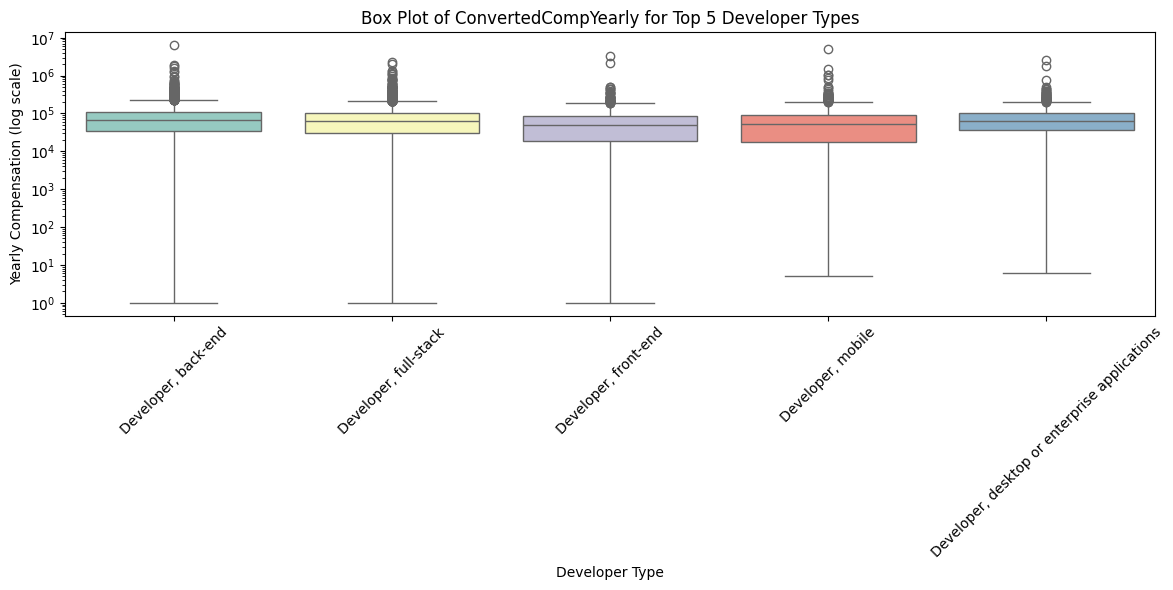

In [14]:
# your code goes here
# Step 1: Load the relevant data
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND DevType != 'NA'
  AND ConvertedCompYearly IS NOT NULL AND ConvertedCompYearly > 0
"""
df = pd.read_sql_query(query, conn)

# Step 2: Expand multiple DevType values into individual rows
df['DevType'] = df['DevType'].str.split(';')  # Adjust delimiter if needed
df_exploded = df.explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Step 3: Get top 5 most common DevTypes
top5_types = df_exploded['DevType'].value_counts().head(5).index.tolist()

# Step 4: Filter for only the top 5 developer types
df_top5 = df_exploded[df_exploded['DevType'].isin(top5_types)]

#Remove extreme outliers for clearer visualization
#df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.99)]

# Step 5: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly',hue='DevType', data=df_top5, palette='Set3')
plt.xticks(rotation=45)
plt.yscale('log')  # Optional if compensation varies greatly
plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (log scale)')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


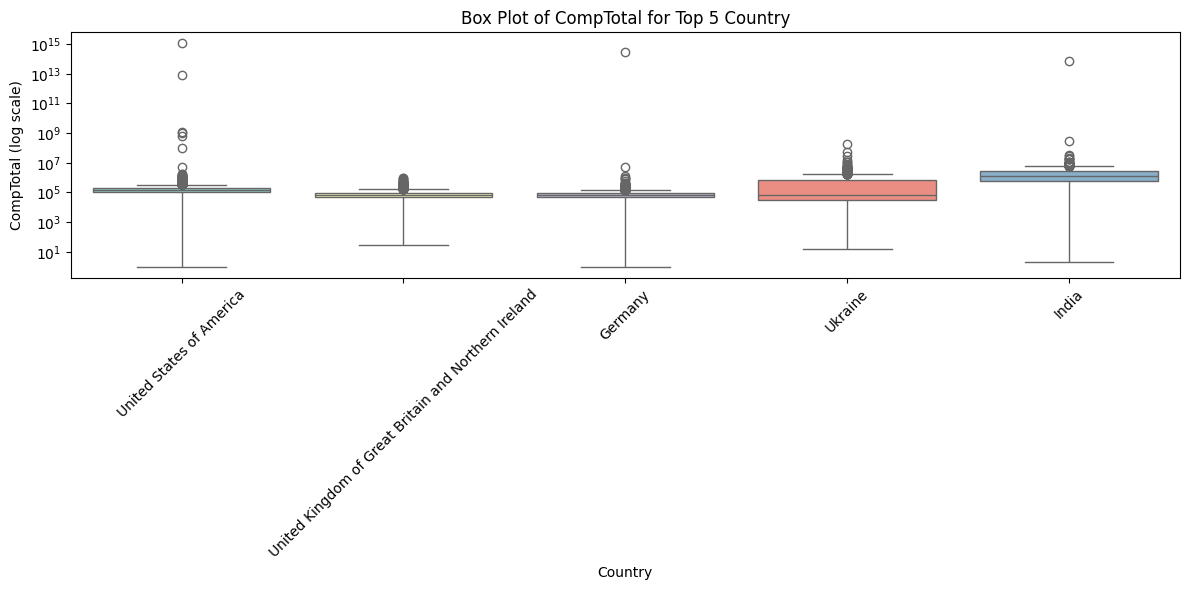

In [15]:
# your code goes here
# Step 1: Load the relevant data
query = """
        SELECT Country, CompTotal
        FROM main
        WHERE Country IS NOT NULL AND Country != 'NA'
        AND CompTotal IS NOT NULL AND CompTotal > 0 """
df = pd.read_sql_query(query, conn)

# Step 2: Expand multiple Country values into individual rows
df['Country'] = df['Country'].str.split(';')  # Adjust delimiter if needed
df_exploded = df.explode('Country')
df_exploded['Country'] = df_exploded['Country'].str.strip()

# Step 3: Get top 5 most common Country
top5_types = df_exploded['Country'].value_counts().head(5).index.tolist()

# Step 4: Filter for only the top 5 Country
df_top5 = df_exploded[df_exploded['Country'].isin(top5_types)]

#Remove extreme outliers for clearer visualization
#df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.99)]

# Step 5: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal',hue='Country', data=df_top5, palette='Set3')
plt.xticks(rotation=45)
plt.yscale('log')  # Optional if compensation varies greatly
plt.title('Box Plot of CompTotal for Top 5 Country')
plt.xlabel('Country')
plt.ylabel('CompTotal (log scale)')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


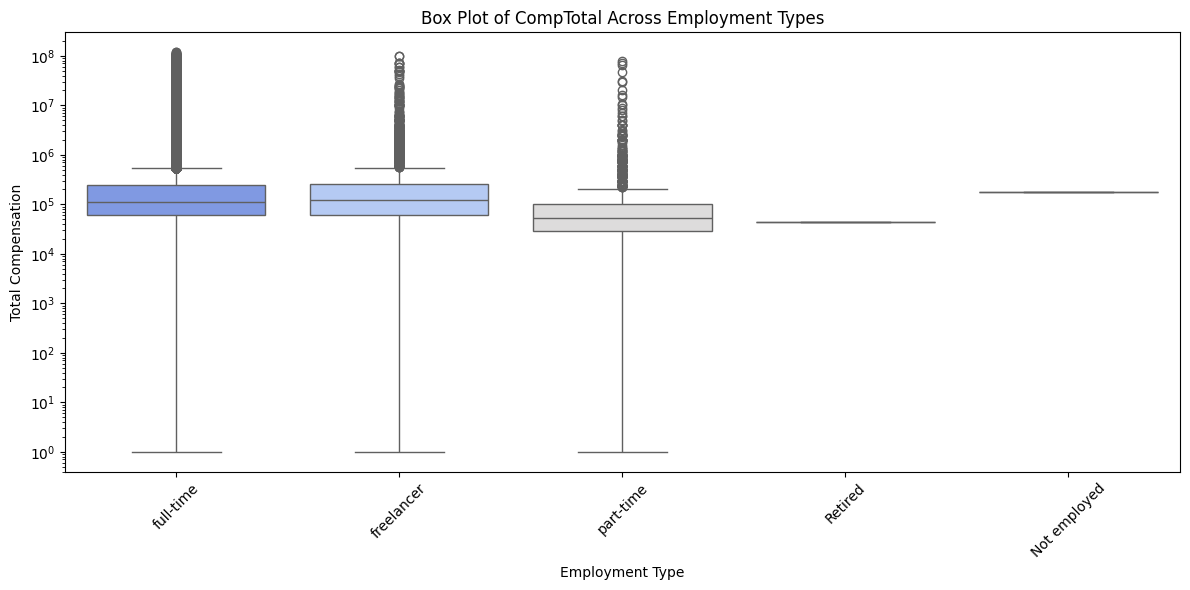

In [22]:
# your code goes here
query = """
SELECT 
(CASE 
        WHEN Employment like '%full-time%'  THEN 'full-time'
        WHEN Employment like '%part-time%' THEN 'part-time' 
        WHEN Employment like '%Student%' THEN 'Student' 
		WHEN Employment like '%freelancer%' THEN 'freelancer' 
		WHEN Employment like '%Retired%' THEN 'Retired'
		WHEN Employment like '%Not employed%' THEN 'Not employed'
        ELSE null 
        END )Employment
, CompTotal
FROM main
WHERE Employment !='NA'
  AND CompTotal!='NA'
  AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)

# Step 2: Optional - remove extreme outliers
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# Step 3: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='CompTotal',hue="Employment", data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Box Plot of CompTotal Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_452/829535589.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatBin', y='YearsCodePro', data=df, palette='Set2')


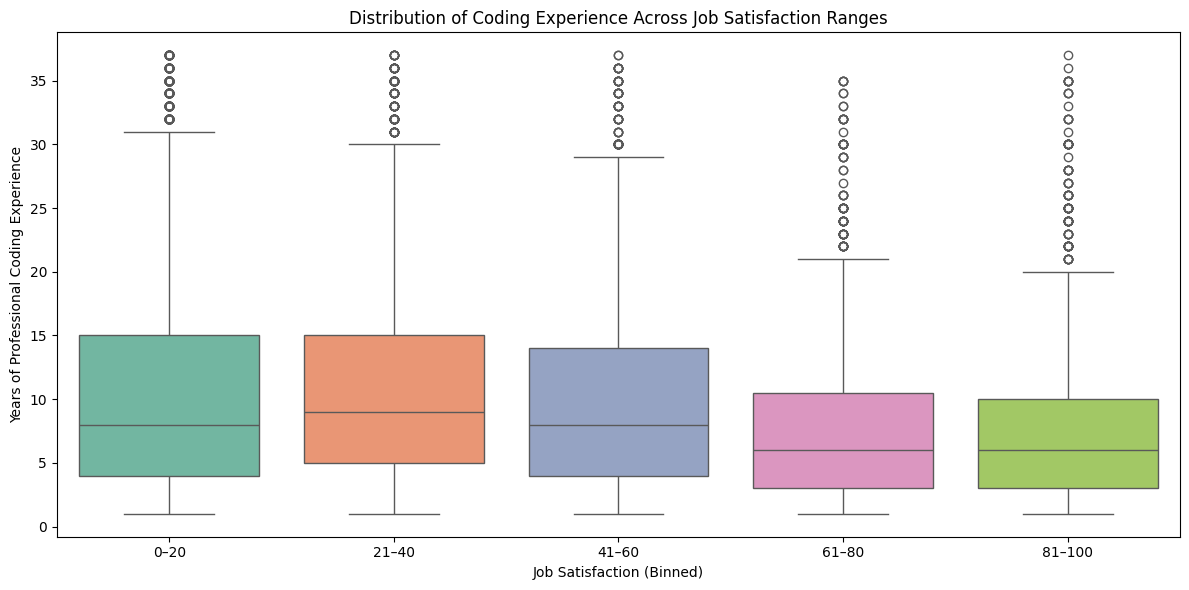

In [26]:
# your code goes here
# your code goes here
query = """
SELECT JobSatPoints_6, YearsCodePro AS YearsCodePro
FROM main
WHERE YearsCodePro !='NA'
  AND JobSatPoints_6!='NA'
"""
df = pd.read_sql_query(query, conn)

# Convert to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Remove outliers in YearsCodePro if needed
df = df[df['YearsCodePro'] < df['YearsCodePro'].quantile(0.99)]

# Bin job satisfaction scores
bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']
df['JobSatBin'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatBin', y='YearsCodePro', data=df, palette='Set2')
plt.title('Distribution of Coding Experience Across Job Satisfaction Ranges')
plt.xlabel('Job Satisfaction (Binned)')
plt.ylabel('Years of Professional Coding Experience')
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
